In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_pie(df):
    column_counts = df.sum()
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Distribution of Rows Across Columns")
    plt.show()

In [2]:
patient_injuries = pd.read_csv("data/train.csv", index_col=0)

In [3]:
# get patients with segmentations
series_ids = [int(series_id[:-4]) for series_id in os.listdir("data/segmentations")]
series_meta = pd.read_csv("data/train_series_meta.csv", index_col=1)
patients_with_segmentations = list(series_meta.loc[series_ids]["patient_id"])

# Out of patients with injuries, how many are with segmentations

C:\Users\Louis\AppData\Local\Temp\ipykernel_3508\3973045895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_injuries["with_segmentations"] = 0
C:\Users\Louis\AppData\Local\Temp\ipykernel_3508\3973045895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_injuries["no_segmentations"] = 1 - with_injuries["with_segmentations"]


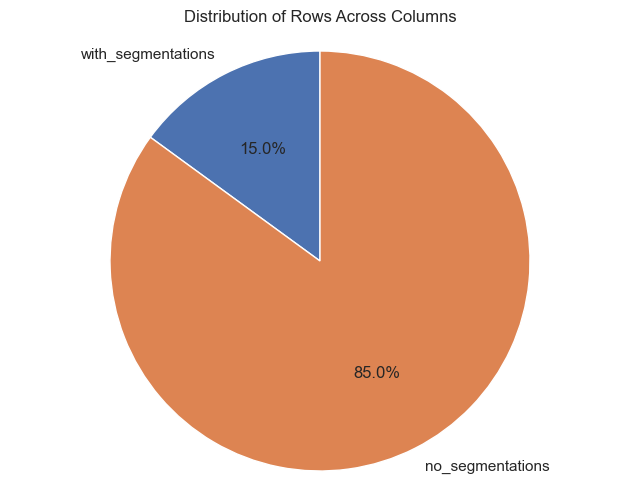

In [4]:
# out of patient with injuries, how many are with segmentations
with_injuries = patient_injuries.loc[patient_injuries["any_injury"] == 1]
with_injuries["with_segmentations"] = 0
for patient_id in patients_with_segmentations:
    with_injuries.loc[patient_id, "with_segmentations"] = 1
with_injuries["no_segmentations"] = 1 - with_injuries["with_segmentations"]
plot_pie(with_injuries[["with_segmentations", "no_segmentations"]])

# Out of patients with segmentations

In [5]:
patient_injuries = patient_injuries.loc[patients_with_segmentations]
for col in patient_injuries.columns:
    assert ((patient_injuries[col] < 0) | (patient_injuries[col] > 1)).sum() == 0
assert (((patient_injuries["bowel_healthy"] == 0) | (patient_injuries["extravasation_healthy"] == 0) | (patient_injuries["kidney_healthy"] == 0) |
     (patient_injuries["liver_healthy"] == 0) | (patient_injuries["spleen_healthy"] == 0)) != (patient_injuries["any_injury"] == 1)).sum() == 0

In [6]:
patient_injuries

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
patient_id,,,,,,,,,,,,,,
54722,1,0,1,0,1,0,0,0,1,0,0,1,0,1
48710,1,0,0,1,1,0,0,0,1,0,1,0,0,1
62116,1,0,0,1,0,0,1,1,0,0,0,0,1,1
34409,1,0,1,0,1,0,0,0,0,1,0,1,0,1
28925,1,0,0,1,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58729,1,0,1,0,1,0,0,0,0,1,0,1,0,1
4093,0,1,0,1,1,0,0,0,1,0,0,0,1,1
39330,1,0,1,0,0,1,0,0,1,0,1,0,0,1


# Bowel

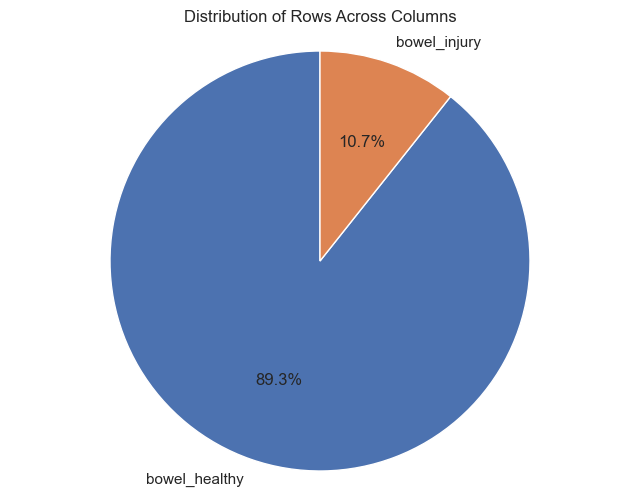

In [7]:
plot_pie(patient_injuries[["bowel_healthy", "bowel_injury"]])

# Extravasation

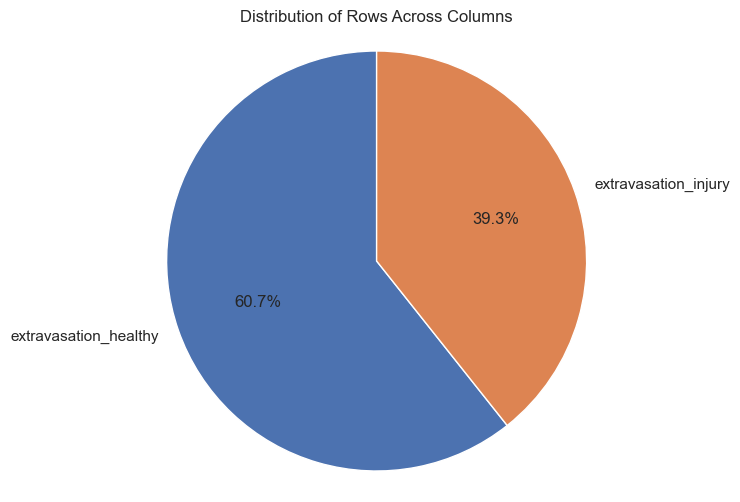

In [8]:
plot_pie(patient_injuries[["extravasation_healthy", "extravasation_injury"]])

# Kidney

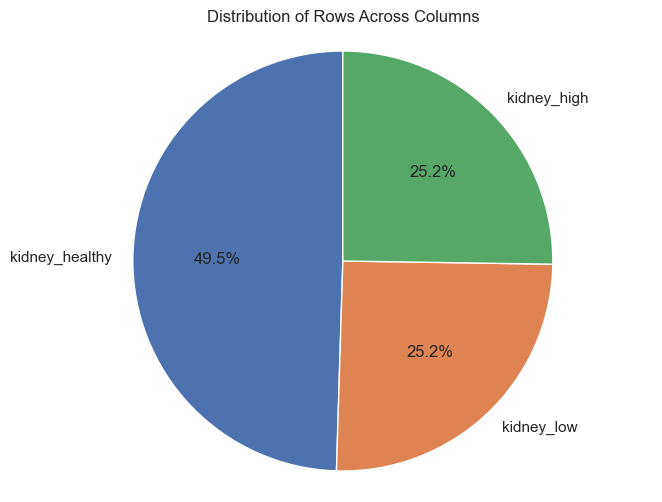

In [9]:
plot_pie(patient_injuries[["kidney_healthy", "kidney_low", "kidney_high"]])

# Liver

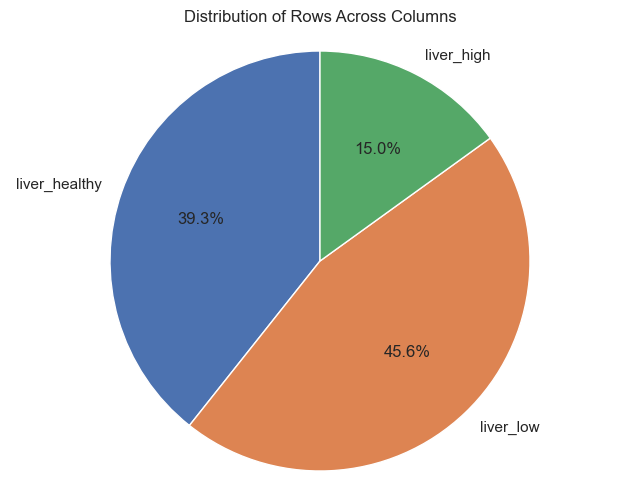

In [10]:
plot_pie(patient_injuries[["liver_healthy", "liver_low", "liver_high"]])

# Spleen

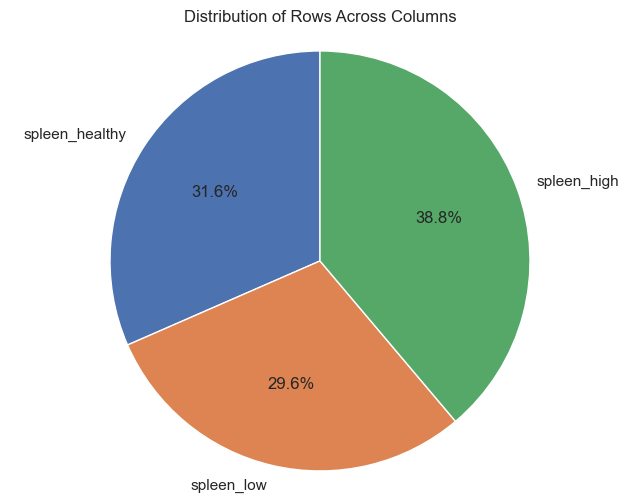

In [11]:
plot_pie(patient_injuries[["spleen_healthy", "spleen_low", "spleen_high"]])

# All injuries

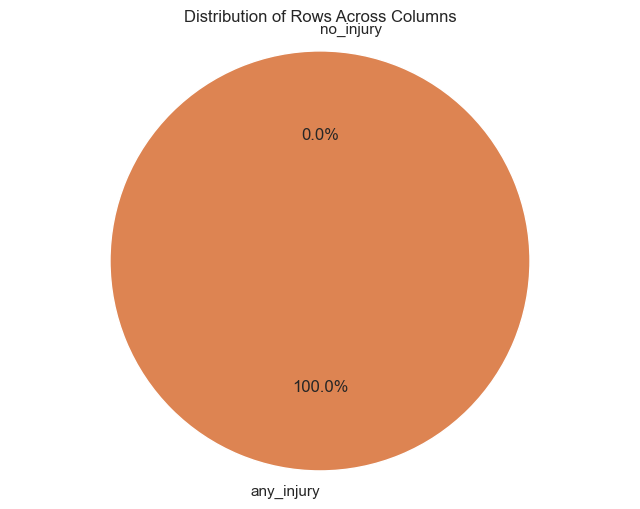

In [12]:
patient_injuries["no_injury"] = 1 - patient_injuries["any_injury"]
plot_pie(patient_injuries[["no_injury", "any_injury"]])